In [1]:
import numpy as np
import json
import time 
import tweepy
import matplotlib.pyplot as plt
import apikeys
import pandas as pd
import datetime as dt
from twitter import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import statsmodels.api as sm

{'created_at': 'Wed Mar 01 16:19:58 +0000 2017', 'id': 836974302465503232, 'id_str': '836974302465503232', 'text': 'RT @nytpolitics: Fact Check: Trump said ninety-four million Americans are out of the labor force. This is misleading. https://t.co/Nd4BX4UM…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'nytpolitics', 'name': 'NYT Politics', 'id': 14434063, 'id_str': '14434063', 'indices': [3, 15]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 83880839, 'id_str': '83880839', 'name': 'Iman', 'screen_name': 'Imanjani', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 40, 'friends_count': 114, 'listed_count': 1, 'created_

In [2]:
# Twitter API Keys
consumer_key = apikeys.TWITTER_CONSUMER_KEY
consumer_secret = apikeys.TWITTER_CONSUMER_SECRET
access_token = apikeys.TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.TWITTER_ACCESS_TOKEN_SECRET

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#here is the code to get 17000 tweets from tweeter this part takes more than 7 hours and we downloaded the output on Data2.csv

# timestamp=[]
# text=[]
# screen_name=[]
# positive=[]
# negative=[]
# neutral=[]
# symbol=[]
# compound=[]
# week=[]
# counter=0
# count=0   
# target_user=["@SatoshiLite","@businessinsider","@TechCrunch","@arstechnica","@Forbes","@WSJ","@washingtonpost",
#                   "@CNN","@FoxNews","@NBCNews","@ABC","@sfchronicle", "@Bloomberg", "@MorganStanley",
#                  "@usbank","@CNBC","@elonmusk","@elonmusk","@BillGates","@WellsFargo"," @jpmorgan", "@reidhoffman",
#                  "@JeffBezos","@mcuban","@JohnKicklighter","@Bitcoin","@BitcoinMagazine","@bitcoincoid", "@business", "@RobertJShiller",
#              "@guardian","@cnnmoneybrk","@ForexYell","@DavidJSong","@JohnKicklighter","@CVecchioFX"]

   
        
#     for page in range (400):

#         tweets=api.user_timeline(user, count=900, page=page)
#         for tweet in tweets:
#             #print (tweet["text"]) 
#             #print(tweet["created_at"])
#             if "bitcoin" in tweet["text"].lower() or "btc" in tweet["text"].lower():
#                 timestamp.append(dt.datetime.strptime(tweet["created_at"], "%a %b %d %X %z %Y").strftime("%b/%d/%Y"))
#                 week.append(dt.datetime.strptime(tweet["created_at"], "%a %b %d %X %z %Y").strftime("%V"))
#                 #timestamp.append(tweet["created_at"])
#                 #text.append(tweet["text"]) # to much data we dont read actual tweet
                
#                 screen_name.append(tweet["user"]["screen_name"])
#                 symbol.append("Bitcoin")
#                 scores = analyzer.polarity_scores(tweet["text"])
#                 comp = scores['compound']
#                 pos = scores['pos']
#                 neut = scores['neu']
#                 neg = scores['neg']

#                 compound.append(comp)
#                 positive.append(pos)
#                 negative.append(neg)
#                 neutral.append(neut)
#         count+=1
#         if count%80 ==0:
#             time.sleep(180)

#     #time.sleep(60)
    
    
# tweeterDF = pd.DataFrame({'name':screen_name,'timestamp':timestamp,'week':week, 'symbol':symbol,
#                             'compound':compound , 'positive':positive, 'negative':negative , 'neutral':neutral})
# tweeterDF = tweeterDF[['name', 'timestamp','week', 'symbol','compound', 'positive', 'negative', 'neutral']]
# tweeterDF2.to_csv("data2.csv")

In [5]:
df=pd.read_csv("data2.csv")
df

,Unnamed: 0,name,timestamp,week,symbol,compound,positive,negative,neutral,add
0,0,SatoshiLite,Dec/09/2017,49,Bitcoin,0.0000,0.000,0.000,1.000,1
1,1,SatoshiLite,Dec/08/2017,49,Bitcoin,0.8176,0.306,0.000,0.694,1
2,2,SatoshiLite,Dec/08/2017,49,Bitcoin,0.0000,0.000,0.000,1.000,1
3,3,SatoshiLite,Dec/07/2017,49,Bitcoin,0.5423,0.231,0.000,0.769,1
4,4,SatoshiLite,Dec/07/2017,49,Bitcoin,-0.7017,0.000,0.286,0.714,1
5,5,SatoshiLite,Dec/07/2017,49,Bitcoin,0.0000,0.000,0.000,1.000,1
6,6,SatoshiLite,Dec/07/2017,49,Bitcoin,-0.6486,0.000,0.227,0.773,1
7,7,SatoshiLite,Dec/07/2017,49,Bitcoin,0.0000,0.000,0.000,1.000,1
8,8,SatoshiLite,Dec/07/2017,49,Bitcoin,0.1531,0.065,0.000,0.935,1
9,9,SatoshiLite,Dec/07/2017,49,Bitcoin,0.6696,0.170,0.000,0.830,1


In [6]:
#claen up 
df=df[['name', 'timestamp','week', 'symbol','compound', 'positive', 'negative', 'neutral']]



In [7]:
# get only data for 2017
df=df[df['timestamp'].str.endswith('2017')]
df

,name,timestamp,week,symbol,compound,positive,negative,neutral
0,SatoshiLite,Dec/09/2017,49,Bitcoin,0.0000,0.000,0.000,1.000
1,SatoshiLite,Dec/08/2017,49,Bitcoin,0.8176,0.306,0.000,0.694
2,SatoshiLite,Dec/08/2017,49,Bitcoin,0.0000,0.000,0.000,1.000
3,SatoshiLite,Dec/07/2017,49,Bitcoin,0.5423,0.231,0.000,0.769
4,SatoshiLite,Dec/07/2017,49,Bitcoin,-0.7017,0.000,0.286,0.714
5,SatoshiLite,Dec/07/2017,49,Bitcoin,0.0000,0.000,0.000,1.000
6,SatoshiLite,Dec/07/2017,49,Bitcoin,-0.6486,0.000,0.227,0.773
7,SatoshiLite,Dec/07/2017,49,Bitcoin,0.0000,0.000,0.000,1.000
8,SatoshiLite,Dec/07/2017,49,Bitcoin,0.1531,0.065,0.000,0.935
9,SatoshiLite,Dec/07/2017,49,Bitcoin,0.6696,0.170,0.000,0.830


In [8]:
#create series for tweet
tweet_counts=df.groupby("week").count()
tweet_count=tweet_counts["name"][1:]
tweet_count

week
2      238
3      203
4      250
5      237
6      246
7      226
8      239
9      241
10     260
11     225
12     245
13     198
14     220
15     214
16     234
17     204
18     201
19     222
20     233
21     210
22     234
23     278
24     298
25     271
26     230
27     173
28     119
29     103
30     101
31     136
32      87
33     100
34     164
35     110
36     150
37     119
38     113
39     147
40      99
41      90
42      99
43      95
44     170
45     204
46     248
47     228
48     663
49    1024
52      36
Name: name, dtype: int64

In [9]:
#create series for compound
weekly_compound=df.groupby("week").compound.mean()


In [10]:
#adding bitcoin weekly prices 

bitcoin=pd.read_csv("bitcoin.csv")
bitcoin.head()

,week,Date,Open,High,Low,Close,Adj Close,Volume,Changes
0,1,1/1/17,963.380005,1150.630005,806.659973,888.869995,888.869995,870316976,1.000000
1,2,1/8/17,888.869995,936.130005,739.549988,819.630005,819.630005,538236894,-0.077897
2,3,1/15/17,819.630005,928.929993,808.630005,919.840027,919.840027,305189873,0.122263
3,4,1/22/17,919.840027,938.380005,883.630005,918.510010,918.510010,234369803,-0.001446
4,5,1/29/17,918.510010,1041.040039,911.510010,1031.849976,1031.849976,277195041,0.123395


In [11]:
bitcoin=bitcoin[["week","Adj Close","Changes"]]


bitcoin=bitcoin.set_index("week")
bitcoin["Compound"]=weekly_compound

bitcoin["Counts"]=tweet_count

bitcoin=bitcoin.fillna(0)

In [12]:
bitcoin=bitcoin.reset_index()

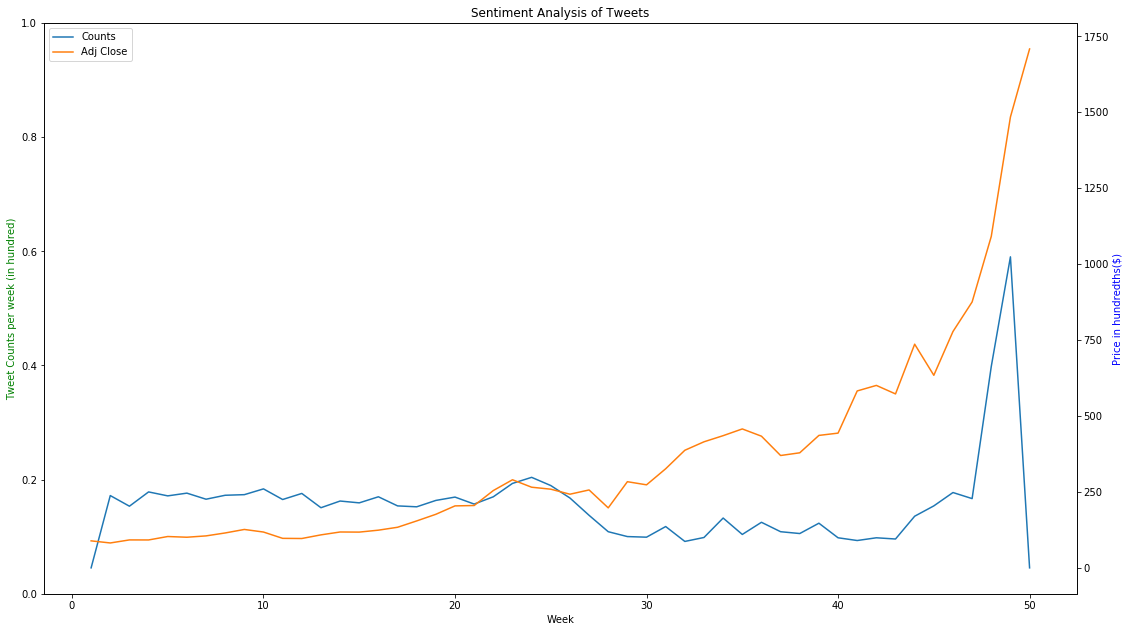

In [13]:
%matplotlib inline
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.plot(bitcoin["week"], bitcoin["Counts"])
plt.plot(bitcoin["week"], (bitcoin["Adj Close"]/10))

ax1.set_ylabel("Tweet Counts per week (in hundred)", color='g')
ax2.set_ylabel("Price in hundredths($)", color='b')

plt.title("Sentiment Analysis of Tweets")

ax1.set_xlabel('Week')
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.savefig('Tweet per Week.png')

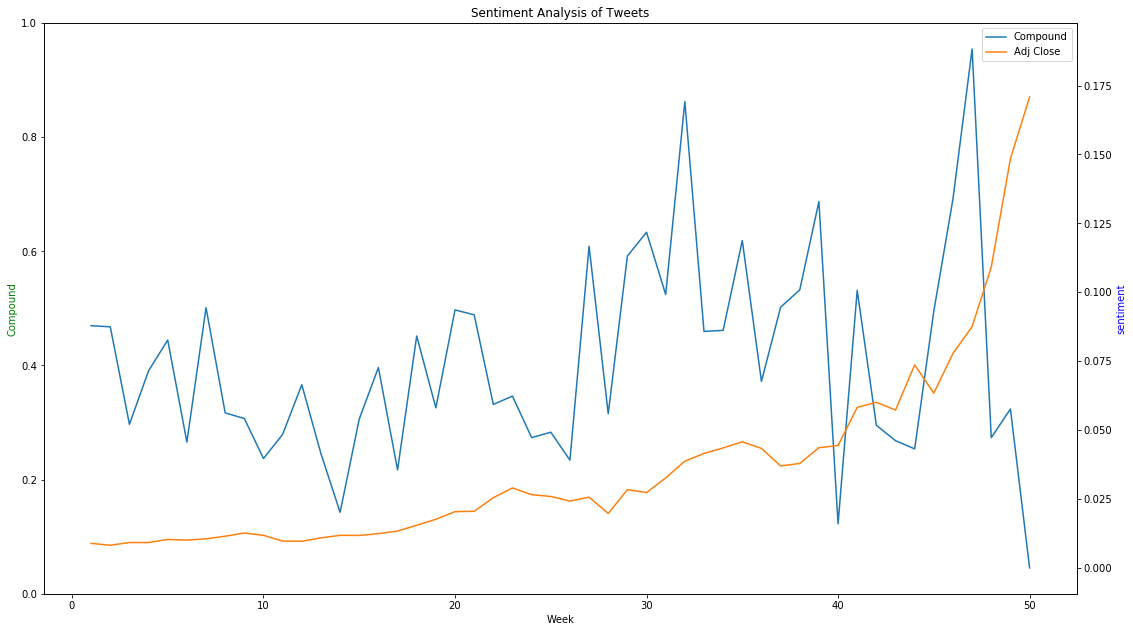

In [14]:
%matplotlib inline
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.plot(bitcoin["week"], bitcoin['Compound'])
plt.plot(bitcoin["week"], (bitcoin["Adj Close"]/100000))

ax1.set_ylabel("Compound", color='g')
ax2.set_ylabel("Price", color='b')

plt.title("Sentiment Analysis of Tweets")
plt.ylabel("sentiment")
ax1.set_xlabel('Week')
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.savefig('Sentiment.png')


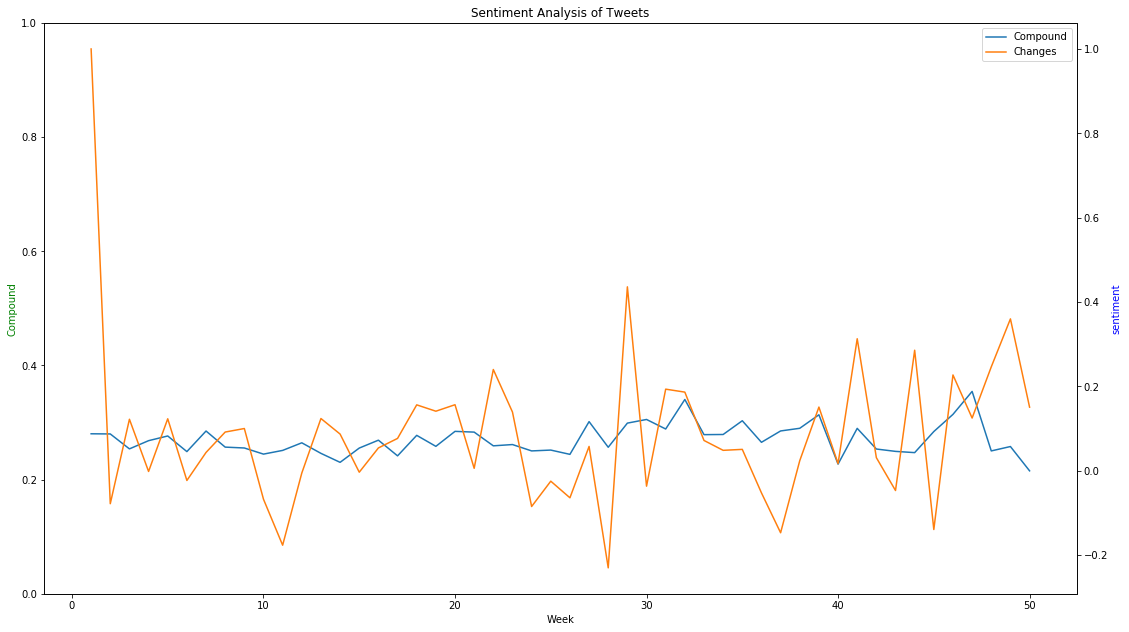

In [15]:
#matplotlib notebook
#%matplotlib inline
plt.figure(figsize=(30,20))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.plot(bitcoin["week"], bitcoin['Compound'])
plt.plot(bitcoin["week"], bitcoin["Changes"])

ax1.set_ylabel("Compound", color='g')
ax2.set_ylabel("Changes", color='b')

plt.title("Sentiment Analysis of Tweets")
plt.ylabel("sentiment")
plt.xlabel("week")

ax1.set_xlabel('Week')
fig.set_size_inches(18.5, 10.5)
plt.savefig('Changes per week.png')
plt.legend()

In [ ]:
X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [17]:
import statsmodels.api as sm
X = bitcoin[['Compound','Counts']]
y = bitcoin["Changes"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Changes   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     6.604
Date:                Tue, 12 Dec 2017   Prob (F-statistic):            0.00293
Time:                        19:55:07   Log-Likelihood:                 13.867
No. Observations:                  50   AIC:                            -23.73
Df Residuals:                      48   BIC:                            -19.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Compound       0.9328      0.437      2.137      0.038       0.055       1.811
Counts      9.593e-05      0.000      0.679      0.500      -0.000       0.000
==============================================================================
Omnibus:                       49.166   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.449
Skew:                           2.448   Prob(JB):                     1.14e-59
Kurtosis:                      13.311   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = bitcoin[['Compound','Counts']]
y = bitcoin["Adj Close"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     31.36
Date:                Tue, 12 Dec 2017   Prob (F-statistic):           1.94e-09
Time:                        19:55:50   Log-Likelihood:                -475.47
No. Observations:                  50   AIC:                             954.9
Df Residuals:                      48   BIC:                             958.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Compound    1.801e+04   7769.009      2.319      0.025    2394.279    3.36e+04
Counts         9.8794      2.513      3.931      0.000       4.826      14.933
==============================================================================
Omnibus:                       55.890   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.558
Skew:                           2.847   Prob(JB):                     8.38e-79
Kurtosis:                      14.839   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""